# SOM (Self-Organizing Map) - Manual - Base Ternária

### Aprendizagem não supervisionada 
### Clusterização

## Importação das bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
base = pd.read_csv('../../bases/baseTernaria.txt')
entradas = base.iloc[:, 0:len(base.columns) -1].values 
classes = base.iloc[:,len(base.columns)-1].values
NumColunas = len(base.columns) - 1
entradas = np.asarray(entradas, dtype=np.float32)
base.head(5)

,0.00234148759345,2.484356589,396172138.406,13184.3097039,0.533112719953,51724.5129095,2.26348078086,2.77132864597,0.00115404970126,0.591052858553,...,112.209716643,0.00586893339572,52731.8212198,12873885.5732,3244547962.24,1.1757859734,0.00389183850907,13183.210839,5.78451996503e-10,c1_p1
0,0.001761,3.579211,5.476226e+08,15717.390250,0.482913,61734.857846,2.303583,2.885987,0.001010,0.655670,...,122.730859,0.004136,62856.598895,1.666798e+07,4.549369e+09,1.410837,0.009247,15714.213740,8.333754e-10,c1_p1
1,0.001382,11.140015,4.537162e+08,17196.365985,0.352437,67619.439003,2.244540,3.054107,0.000663,0.859476,...,129.192630,0.003692,68770.276182,1.886087e+07,5.329816e+09,2.401581,0.004161,17190.793344,2.593816e-09,c1_p1
2,0.001332,3.547210,8.804298e+08,15732.815167,0.486658,61787.815220,2.421049,2.996713,0.001015,0.654426,...,120.601126,0.002868,62946.110184,1.767228e+07,5.295252e+09,1.399464,-0.017187,15736.582924,8.259244e-10,c1_p1
3,0.001326,6.730192,5.843474e+08,16681.149415,0.405101,65546.559448,2.307848,3.017531,0.000796,0.769949,...,126.472728,0.003249,66704.800634,1.829152e+07,5.200287e+09,1.909767,0.011973,16675.505663,1.567043e-09,c1_p1
4,0.001190,3.392427,1.253675e+09,17221.057939,0.495633,67671.177905,2.469034,3.033598,0.001035,0.646316,...,125.712138,0.002273,68902.703503,2.031699e+07,6.362667e+09,1.362016,-0.019963,17225.809880,7.898851e-10,c1_p1


## Pré-processamento dos Dados de Entrada

### Padronização dos dados

In [3]:
def Padronizacao(entradas):
    for i in range (len(base.columns)-1):
        entradas[:,i] = (entradas[:,i] - np.median(entradas[:,i]))/entradas[:,i].std(axis = 0)
    return entradas

### Normalização dos dados

In [4]:
def Normalizacao(entradas):
    for i in range (len(base.columns)-1):
        entradas[:,i] = (entradas[:,i] - np.min(entradas[:,i]))/(np.max(entradas[:,i]) - np.min(entradas[:,i]))
    return entradas

### Transformação das classes para o tipo numérico

In [5]:
labelEncoder = LabelEncoder()
classesN = labelEncoder.fit_transform(classes)
print(classesN)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

### Plotagem dos dados (colunas 1 e 2)

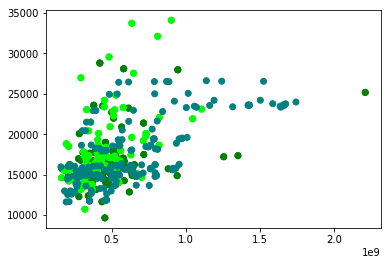

In [6]:
x = base.iloc[:,2].values
y = base.iloc[:,3].values

color= ['lime' if l == 1 else 'teal' if l == 2 else 'green' for l in classesN]
plt.scatter(x, y, color=color)

## Entradas do usuário e demais atributos

In [7]:
epocas = int(input('\033[1m' + "Digite a quantidade de épocas: "))
TaxaAprendIni = float(input('\033[1m' + "Digite a taxa de aprendizado: "))
linhas = int(input('\033[1m' + "Digite a quantidade de linhas da rede SOM: "))
colunas = int(input('\033[1m' + "Digite a quantidade de colunas da rede SOM: "))
TamVizIni = int(input('\033[1m' + "Digite o tamanho da vizinhança da rede SOM: "))
tempTamViz = len(entradas)/math.log(TamVizIni)
print("Digite:")
print("1: Normalização dos dados ")
print("2: Padronização dos dados ")
PadNorm = int(input(""))
if (PadNorm == 1):
    entradas = Normalizacao(entradas)
else:    
    entradas = Padronizacao(entradas)
k =  int(input('\033[1m' + "Digite o valor dos K vizinhos para o KNN: "))

    
dimensoes = NumColunas
pesos = np.random.uniform(size = (linhas, colunas, dimensoes))
pesosAnt = np.zeros((linhas, colunas, dimensoes))
raioIni = max(colunas, linhas) / 2
CalcularVizinhanca = np.zeros((linhas, colunas))



print("Carregamento de pesos: ")
print("Atenção, caso não existam dados a serem carregados com as configurações inseridas o programa não irá ser executado")
carregarPesos = int(input("Deseja carregar pesos salvos? (1 - Sim, 2 - Não)"))
if (carregarPesos == 1):    
    pesos = np.load(str("../resultados/SOM/pesosSOM_BaseTernaria/SOM-Ep_"+str(epocas) + "L_"+ str(linhas) + "C_"+ str(colunas)+"TA_"+ str(TaxaAprendIni)+ "V_Ini_"+str(TamVizIni)+ "PadNorm_"+ str(PadNorm)+ ".npy"))


Digite a quantidade de épocas: 300
Digite a taxa de aprendizado: 0.5
Digite a quantidade de linhas da rede SOM: 15
Digite a quantidade de colunas da rede SOM: 15
Digite o tamanho da vizinhança da rede SOM: 7
Digite:
1: Normalização dos dados 
2: Padronização dos dados 
1
Digite o valor dos K vizinhos para o KNN: 7
Carregamento de pesos: 
Atenção, caso não existam dados a serem carregados com as configurações inseridas o programa não irá ser executado
Deseja carregar pesos salvos? (1 - Sim, 2 - Não)2


In [8]:
coordenadas = np.zeros([linhas,colunas,2],dtype=np.int32)
for i in range(0, linhas):
    for j in range(0, colunas):
        coordenadas[i][j] = [i,j]

In [9]:
raio = raioIni
TaxaAprend = TaxaAprendIni
max_iterations = len(entradas)+1
too_many_iterations = 10 * max_iterations
convergencia = [1]
e = 0.001 
flag = 0
epoca = 0

### Treinamento

In [10]:
while epoca < epocas:
    shuffle = np.random.randint(len(entradas), size=len(entradas))
    for i in range(len(entradas)):   
        # Distância euclidiana - erro de quantização
        J = np.linalg.norm(pesos - pesosAnt)
        # Condição para convergência
        if  J <= e: 
            flag = 1
            break            
        else:            
            entrada = entradas[shuffle[i]]
            entrada_mod = np.tile(entrada, (linhas, colunas, 1))
            Distancias = np.linalg.norm(entrada_mod - pesos, axis=2)
                                   
            # Obtem o neurônio vencedor, ou seja, o que tem menor distância
            BMU = np.unravel_index(np.argmin(Distancias, axis=None), Distancias.shape)            
            pesosAnt = np.copy(pesos)             
                                    
            # Funcao de Vizinhança
            # equação 3.18 - notas de aulas - IFCE - ICA
            for l in range(linhas):
                for m in range(colunas):
                    if ((l == BMU[0]) and (m == BMU[1])):
                        CalcularVizinhanca[l][m] = 1
                    else:
                        CalcularVizinhanca[l][m] = math.exp(-(((BMU[0] - l)**2) + ((BMU[1] - m)**2))/tempTamViz**2)
            
            for i in range(linhas):
                for j in range(colunas):
                    distance = np.linalg.norm([i - BMU[0], j - BMU[1]])
                    if distance <= raio:
                        # Atualização do vetor de pesos
                        pesos[i][j] = pesos[i][j] + TaxaAprend * CalcularVizinhanca[i][j] * (entrada-pesos[i][j])
                        
            TaxaAprend = TaxaAprendIni * (1- (epoca/ epocas)) 
            
            # decaimento do spread
            raio = raioIni * math.exp(-epoca/epocas)            
            
    if J < min(convergencia):
        pesos_finais = pesos
    convergencia.append(J)
    
    if flag==1:
        break
    epoca+=1

### Salvar os pesos da rede SOM

In [11]:
np.save("../resultados/SOM/pesosSOM_BaseTernaria/SOM-Ep_"+str(epocas) + "L_"+ str(linhas) + "C_"+ str(colunas)+"TA_"+ str(TaxaAprendIni)+ "V_Ini_"+str(TamVizIni)+ "PadNorm_"+ str(PadNorm) , pesos_finais)

### Plotagem da taxa de erro x época

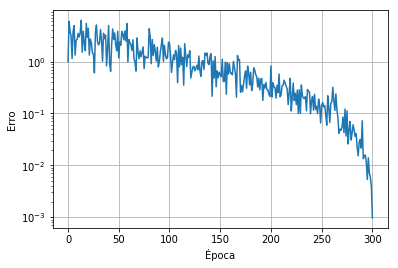

Erro de quantização: 0.0009658511143029206


In [12]:
ErroQuantizacao = J
plt.plot(convergencia)
plt.ylabel('Erro')
plt.xlabel('Época')
plt.grid(True)
plt.yscale('log')
plt.show()
print('Erro de quantização: ' + str(J))

### Plotagem da Rede SOM

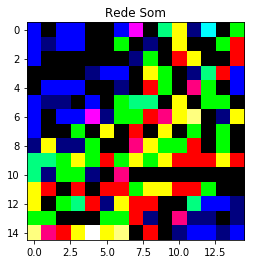

In [13]:
BMU = np.zeros([2],dtype=np.int32)
result_map = np.zeros([linhas,colunas,3],dtype=np.float32)

i = 0
for entrada in entradas: 
    entrada_mod = np.tile(entrada, (linhas, colunas, 1))
    Distancias = np.linalg.norm(entrada_mod - pesos_finais, axis=2)

    # Obtem o neurônio vencedor, ou seja, o que tem menor distância
    BMU = np.unravel_index(np.argmin(Distancias, axis=None), Distancias.shape)
    
    # Salva a posição do mesmo
    x = BMU[0]
    y = BMU[1]
        
    if classesN[i] == 0:
        if result_map[x][y][0] <= 0.5:
            result_map[x][y] += np.asarray([0.5,0,0])
    elif classesN[i] == 1:
        if result_map[x][y][1] <= 0.5:
            result_map[x][y] += np.asarray([0,0.5,0])
    elif classesN[i] == 2:
        if result_map[x][y][2] <= 0.5:
            result_map[x][y] += np.asarray([0,0,0.5])
    i += 1
result_map = np.flip(result_map,0)
plt.title("Rede Som")
plt.imshow(result_map, interpolation='nearest')

## KNN

### Localização das K classes mais próximas  

In [14]:
pesos = pesos_finais.reshape(linhas * colunas, dimensoes)
matrizTempKNN = np.zeros((linhas * colunas, len(entradas)))
matrizKNN = np.zeros((linhas * colunas, k))
matrizKNNPos = np.zeros((linhas * colunas, k))


for i in range(linhas * colunas):
    for j in range(len(entradas)):
        matrizTempKNN[i][j] = np.linalg.norm(pesos[i] - entradas[j])
        # Linhas representam os neurônios e colunas as entradas

    for m in range(k):        
        menor = min(matrizTempKNN[i])        
        n_pos = matrizTempKNN[i].argmin() 
        matrizKNNPos[i][m] = n_pos
        matrizKNN[i][m] = classesN[n_pos]
        matrizTempKNN[i][n_pos] = 99999

print(matrizKNN)

[[2. 1. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 2. 1.]
 [1. 1. 0. ... 0. 1. 1.]
 ...
 [1. 1. 2. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 [1. 1. 0. ... 0. 0. 0.]]


In [15]:
def unique(list1):   
    unique_list = [] 
    for x in list1: 
        if x not in unique_list: 
            unique_list.append(x) 
    return x

### Criação da matriz KNN (representação dos neurônios)

In [16]:
NumClasses = unique(classesN) 
print(matrizKNN)
for i in range(linhas * colunas):     
    for j in range(k):  
        matrizKNN[i][j] = matrizKNN[i][j] + 1

[[2. 1. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 2. 1.]
 [1. 1. 0. ... 0. 1. 1.]
 ...
 [1. 1. 2. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 [1. 1. 0. ... 0. 0. 0.]]


In [17]:
M_KNN = np.zeros((linhas * colunas, NumClasses+1))
for i in range(linhas * colunas):     
    for j in range(k):       
        M_KNN[i][int(matrizKNN[i][j])-1] = M_KNN[i][int(matrizKNN[i][j])-1] + 1        

In [18]:
print(M_KNN)

[[3. 3. 1.]
 [3. 3. 1.]
 [3. 4. 0.]
 [2. 4. 1.]
 [2. 5. 0.]
 [2. 5. 0.]
 [3. 4. 0.]
 [4. 2. 1.]
 [6. 0. 1.]
 [6. 0. 1.]
 [2. 0. 5.]
 [0. 0. 7.]
 [0. 0. 7.]
 [0. 0. 7.]
 [0. 0. 7.]
 [3. 4. 0.]
 [3. 4. 0.]
 [3. 4. 0.]
 [4. 2. 1.]
 [5. 2. 0.]
 [2. 5. 0.]
 [3. 4. 0.]
 [4. 2. 1.]
 [6. 0. 1.]
 [7. 0. 0.]
 [4. 0. 3.]
 [0. 0. 7.]
 [0. 0. 7.]
 [0. 0. 7.]
 [0. 0. 7.]
 [5. 2. 0.]
 [3. 4. 0.]
 [3. 4. 0.]
 [5. 2. 0.]
 [7. 0. 0.]
 [5. 2. 0.]
 [5. 2. 0.]
 [6. 1. 0.]
 [6. 0. 1.]
 [7. 0. 0.]
 [6. 0. 1.]
 [1. 0. 6.]
 [0. 0. 7.]
 [0. 0. 7.]
 [0. 0. 7.]
 [6. 0. 1.]
 [6. 0. 1.]
 [4. 2. 1.]
 [5. 2. 0.]
 [4. 2. 1.]
 [6. 0. 1.]
 [6. 0. 1.]
 [5. 2. 0.]
 [7. 0. 0.]
 [7. 0. 0.]
 [7. 0. 0.]
 [5. 2. 0.]
 [3. 2. 2.]
 [2. 4. 1.]
 [2. 4. 1.]
 [3. 2. 2.]
 [0. 6. 1.]
 [0. 7. 0.]
 [5. 2. 0.]
 [4. 2. 1.]
 [3. 2. 2.]
 [4. 2. 1.]
 [5. 2. 0.]
 [3. 4. 0.]
 [5. 2. 0.]
 [6. 1. 0.]
 [7. 0. 0.]
 [4. 3. 0.]
 [3. 4. 0.]
 [3. 4. 0.]
 [0. 5. 2.]
 [0. 7. 0.]
 [0. 7. 0.]
 [3. 4. 0.]
 [3. 4. 0.]
 [3. 4. 0.]
 [5. 2. 0.]
 [2. 5. 0.]
 [3.

### Resultados do KNN

In [19]:
resultados = np.zeros(linhas * colunas)
for i in range(linhas * colunas):
        cont = 0
        maximo = np.max(M_KNN[i])   
        id_max = M_KNN[i].argmax()
        for j in range(NumClasses):    
            if (maximo == M_KNN[i][j]):
                cont = cont + 1
            if (cont > 1):
                resultados[i] = 9
            else:
                resultados[i] = id_max
        print("Neurônio: "+ str(i + 1) + " - classe: "+ str(resultados[i]+1))    

Neurônio: 1 - classe: 10.0
Neurônio: 2 - classe: 10.0
Neurônio: 3 - classe: 2.0
Neurônio: 4 - classe: 2.0
Neurônio: 5 - classe: 2.0
Neurônio: 6 - classe: 2.0
Neurônio: 7 - classe: 2.0
Neurônio: 8 - classe: 1.0
Neurônio: 9 - classe: 1.0
Neurônio: 10 - classe: 1.0
Neurônio: 11 - classe: 3.0
Neurônio: 12 - classe: 3.0
Neurônio: 13 - classe: 3.0
Neurônio: 14 - classe: 3.0
Neurônio: 15 - classe: 3.0
Neurônio: 16 - classe: 2.0
Neurônio: 17 - classe: 2.0
Neurônio: 18 - classe: 2.0
Neurônio: 19 - classe: 1.0
Neurônio: 20 - classe: 1.0
Neurônio: 21 - classe: 2.0
Neurônio: 22 - classe: 2.0
Neurônio: 23 - classe: 1.0
Neurônio: 24 - classe: 1.0
Neurônio: 25 - classe: 1.0
Neurônio: 26 - classe: 1.0
Neurônio: 27 - classe: 3.0
Neurônio: 28 - classe: 3.0
Neurônio: 29 - classe: 3.0
Neurônio: 30 - classe: 3.0
Neurônio: 31 - classe: 1.0
Neurônio: 32 - classe: 2.0
Neurônio: 33 - classe: 2.0
Neurônio: 34 - classe: 1.0
Neurônio: 35 - classe: 1.0
Neurônio: 36 - classe: 1.0
Neurônio: 37 - classe: 1.0
Neurônio

## Divisão das entradas para classificação e validação

In [20]:
entradas_trei, entradas_val, classes_trei, classes_val = train_test_split(entradas, classesN, test_size=0.20)

## Teste do KNN

In [21]:
num_entradas_trei = len(entradas_trei)
tamanho = pesos.shape
neuronios = tamanho[0]

distancias = np.zeros(neuronios)
classesCalc = np.zeros(len(entradas_trei))

soma = 0
for i in range(num_entradas_trei): 
    for j in range(neuronios):
        dist = np.linalg.norm(pesos[j]-entradas_trei[i]) 
        distancias[j] = dist    
        
    posicao = distancias.argmin()
    classesCalc[i] = int(resultados[posicao])

# cálculo do erro
erro = classes_trei - classesCalc

# Média absoluta do erro
mediaErro = np.mean(np.abs(erro))
print("Média Absoluta do Erro: "+ str(mediaErro))

Média Absoluta do Erro: 0.6555323590814196


### Classes corretas

In [22]:
print(classes_trei)

[2 0 1 2 0 0 2 1 0 1 1 1 1 1 2 2 0 2 1 2 0 0 2 0 2 1 2 1 1 2 0 0 1 1 0 1 1
 2 2 1 0 0 2 2 2 1 2 1 1 1 0 1 0 0 1 1 1 0 0 1 2 0 2 0 0 2 1 0 0 0 2 1 0 1
 1 2 0 0 1 2 2 1 2 0 2 2 0 2 2 1 0 1 2 2 2 1 0 2 0 2 0 2 0 1 2 2 1 2 1 0 2
 2 2 0 2 1 2 0 0 0 2 0 0 1 1 0 2 1 1 0 0 2 0 2 0 1 0 1 1 0 2 1 2 1 1 0 1 2
 2 1 0 1 2 1 0 0 1 2 1 2 0 2 2 2 2 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 2 1 0 2 0
 2 2 2 1 1 0 1 1 0 1 1 0 2 2 0 0 0 1 1 0 0 1 1 2 2 1 2 1 2 0 0 2 2 0 0 1 2
 2 1 2 0 1 1 2 2 1 2 2 1 1 0 1 1 0 0 1 0 1 2 2 0 0 0 1 1 1 2 0 2 0 1 0 1 1
 0 0 0 2 1 2 2 1 2 2 1 0 0 0 0 1 1 0 1 2 2 2 1 2 2 2 0 1 2 2 2 0 0 2 0 1 2
 0 0 0 0 1 2 0 0 0 2 2 0 0 2 2 1 2 1 1 2 2 2 0 1 2 2 0 1 0 2 1 1 0 2 0 0 2
 2 2 1 0 2 0 2 1 1 2 1 0 1 1 0 0 0 2 2 0 0 2 0 2 1 1 2 1 0 2 0 1 2 2 1 0 1
 1 1 0 2 2 2 2 2 1 2 1 1 1 0 0 0 0 0 0 0 2 0 0 2 1 0 1 2 1 2 1 2 1 0 0 2 1
 2 1 0 2 1 2 0 0 0 1 1 2 2 2 0 2 0 2 1 1 2 1 0 0 0 2 0 0 2 0 0 2 1 1 0 0 2
 0 1 2 1 1 0 2 2 2 0 0 2 2 0 1 0 1 2 2 1 1 2 1 2 1 0 0 0 0 1 1 2 2 0 2]


### Classes calculadas

In [23]:
print(classesCalc)

[2. 0. 0. 2. 0. 0. 2. 0. 0. 1. 1. 1. 0. 1. 2. 2. 0. 2. 0. 2. 0. 0. 2. 9.
 2. 1. 2. 1. 1. 2. 1. 0. 0. 0. 0. 0. 1. 2. 2. 1. 0. 1. 1. 2. 2. 9. 2. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 2. 9. 2. 1. 0. 2. 1. 0. 0. 0. 2. 2.
 2. 1. 0. 2. 0. 0. 1. 2. 1. 1. 2. 0. 2. 0. 0. 2. 2. 0. 0. 0. 2. 2. 2. 1.
 1. 2. 0. 2. 0. 2. 0. 1. 2. 0. 0. 2. 1. 0. 0. 2. 2. 0. 2. 0. 2. 0. 0. 1.
 2. 2. 0. 1. 1. 0. 2. 1. 1. 9. 0. 1. 0. 2. 1. 1. 1. 0. 1. 0. 2. 1. 2. 1.
 0. 0. 0. 2. 2. 9. 0. 0. 2. 0. 0. 0. 0. 2. 9. 0. 0. 0. 2. 2. 2. 0. 0. 1.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 2. 0. 2. 1. 1. 2. 0. 2. 0. 2. 9. 1. 0. 9.
 0. 1. 1. 1. 1. 1. 2. 0. 0. 0. 1. 0. 1. 1. 1. 1. 2. 2. 2. 2. 1. 2. 9. 0.
 2. 0. 0. 0. 1. 1. 2. 1. 1. 0. 1. 1. 2. 2. 1. 2. 2. 1. 0. 0. 0. 9. 1. 0.
 1. 0. 1. 2. 2. 0. 1. 0. 0. 1. 1. 1. 2. 2. 1. 1. 9. 0. 1. 1. 0. 0. 2. 0.
 2. 2. 1. 2. 2. 1. 0. 0. 1. 0. 0. 1. 9. 0. 2. 2. 2. 1. 2. 2. 1. 0. 1. 2.
 1. 2. 0. 0. 2. 0. 9. 2. 0. 0. 0. 1. 0. 1. 0. 0. 0. 2. 2. 0. 1. 2. 2. 1.
 2. 0. 1. 2. 2. 2. 0. 1. 2. 2. 0. 1. 0. 2. 1. 1. 1.

## Matriz de confusão

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):   

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Saída correta')
    plt.xlabel('Saída encontrada')    

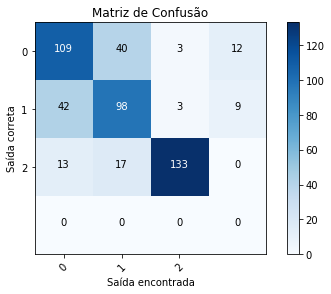

In [25]:
cm = confusion_matrix(classes_trei, classesCalc)
plot_confusion_matrix(cm, 
                      classes=['0', '1', '2'],
                      title='Matriz de Confusão')

### Criar DataSet das Informações sobre as execuções

#### Abre o arquivo

In [26]:
arquivo = open('../resultados/SOM/BaseTernariaDados.txt', 'r')
conteudo = arquivo.readlines()

#### Inserir os dados

In [27]:
conteudo.append("\n"+str(epocas)+","+str(PadNorm)+","+str(linhas)+","+str(colunas)+","+str(TamVizIni)+","+str(TaxaAprendIni)+","+str(TaxaAprend)+","+str(ErroQuantizacao)+","+str(k)+","+str(mediaErro))

#### Abre o arquivo como escrita, escreve o conteúdo e fecha o mesmo

In [28]:
arquivo = open('../resultados/SOM/BaseTernariaDados.txt', 'w')
arquivo.writelines(conteudo)
arquivo.close()

#### Leitura dos dados existentes

In [29]:
arquivo = pd.read_csv('../resultados/SOM/BaseTernariaDados.txt')
arquivo = arquivo.sort_values(by=' MedAbsErro', ascending=True)
arquivo.head(10)

,epocas,NormPad,Linhas,Colunas,TamVizIni,TaxaAprendIni,TaxaAprendFin,ErroQuant,K,MedAbsErro
4,100,1,13,13,3,0.3,0.003000,0.002409,3,0.294363
11,200,1,13,13,3,0.5,0.002500,0.000995,3,0.323591
9,100,1,13,13,3,0.5,0.005000,0.004614,3,0.325678
3,100,1,11,11,3,0.3,0.003000,0.000989,3,0.338205
12,200,1,13,13,3,0.3,0.001500,0.000866,3,0.338205
15,100,2,13,13,3,0.3,0.003000,0.021843,3,0.348643
8,100,1,11,11,3,0.5,0.005000,0.006178,3,0.348643
16,300,2,11,11,5,0.4,0.001333,0.004637,3,0.365344
7,100,1,7,7,3,0.5,0.005000,0.000953,3,0.386221
2,100,1,7,7,3,0.3,0.006000,0.001000,3,0.400835


### Resultados

In [30]:
print("SOM - Erro de quantização: "+ str(ErroQuantizacao))
print("SOM - Épocas: "+ str(epocas))
print("SOM - Tamanho: "+ str(linhas) + " x " + str(colunas))
print("SOM - Taxa de Aprendizado Inicial: "+ str(TaxaAprendIni))
print("SOM - Taxa de Aprendizado Final: "+ str(TaxaAprend))
print("KNN - Número de vizinhos: "+ str(k))
print("KNN - Média Absoluta do Erro: " + str(mediaErro))

SOM - Erro de quantização: 0.0009658511143029206
SOM - Épocas: 300
SOM - Tamanho: 15 x 15
SOM - Taxa de Aprendizado Inicial: 0.5
SOM - Taxa de Aprendizado Final: 0.0016666666666666496
KNN - Número de vizinhos: 7
KNN - Média Absoluta do Erro: 0.6555323590814196
